<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/Lung%20cancer%20detection%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [4]:
# load data set
data=pd.read_csv("/content/thirddatasetdata2.csv")

Data Pre-processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 652 entries, ID to label
dtypes: float64(647), int64(4), object(1)
memory usage: 453.5+ KB


In [6]:
# no null values
data.describe()

,ID,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,...,imaging.radiomics.Wavelet_LLL_stats_mean,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var
count,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,8.900000e+01
mean,45.000000,1012.208653,2.199722e+08,-3428.575953,199.238475,14.204350,0.784925,1.876642,2.327423,0.040106,...,3296.525752,3420.374132,1.450227e+04,3030.010804,3348.628488,-1.455998,476.868030,9.077977e+08,0.124370,1.282471e+08
std,25.836021,679.358803,9.335960e+08,9044.655043,300.519025,10.347644,0.131847,0.385498,1.059273,0.043654,...,1225.905788,1250.338870,1.241660e+05,958.756908,1206.668932,1.014567,270.977154,1.653694e+09,0.092696,4.296026e+08
min,1.000000,19.300824,4.433402e+00,-49512.536610,1.037334,0.547327,0.318639,0.786760,0.486571,0.001374,...,1108.578707,738.829216,-3.638897e+02,355.549890,1616.998221,-4.684032,43.284275,3.977902e+06,0.019136,1.873528e+03
25%,23.000000,620.316872,3.306056e+04,-1863.932510,69.067277,5.935815,0.719189,1.617891,1.450927,0.009523,...,2630.071998,2794.172927,6.159428e+02,2414.456313,2666.177912,-2.094435,343.259433,1.097260e+08,0.054412,1.178270e+05
50%,45.000000,853.181154,5.348398e+04,-1330.659366,95.579742,11.689674,0.817092,1.892272,2.186597,0.026609,...,2750.000975,2895.820234,9.505993e+02,2789.644054,2777.899166,-1.426250,400.864297,3.136865e+08,0.099577,1.606922e+05
75%,67.000000,1152.522054,9.180988e+04,-665.477004,156.055482,20.389241,0.878744,2.201717,3.085783,0.053324,...,3371.829646,3253.998814,1.492840e+03,3551.897868,3540.627444,-0.760666,503.554028,8.770774e+08,0.165904,2.711654e+05
max,89.000000,3872.453374,5.658600e+09,26406.089750,1564.061195,59.088444,0.968290,2.648277,5.471569,0.224920,...,5866.494597,6011.372390,1.172664e+06,5846.377098,5889.557717,0.930680,1434.491073,9.994916e+09,0.557781,2.057765e+09


In [7]:
# no null values in the dataset
data.isnull().sum()

ID                                                 0
imaging.radiomics.GLCM_autocorr                    0
imaging.radiomics.GLCM_clusProm                    0
imaging.radiomics.GLCM_clusShade                   0
imaging.radiomics.GLCM_clusTend                    0
                                                  ..
imaging.radiomics.Wavelet_LLL_stats_std            0
imaging.radiomics.Wavelet_LLL_stats_totalenergy    0
imaging.radiomics.Wavelet_LLL_stats_uniformity     0
imaging.radiomics.Wavelet_LLL_stats_var            0
label                                              0
Length: 652, dtype: int64

In [9]:
data_real = data.replace(np.inf, np.nan)

In [10]:
data_real.isnull().sum().sum()

0

In [11]:
data_df = data_real.dropna(axis=0)

In [12]:
data_df.isnull().sum().sum()

0

In [13]:
data_df

,ID,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,...,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var,label
0,1,1015.604377,1.728441e+06,-16203.786420,995.351478,22.221434,0.957409,2.037688,3.085783,0.017533,...,1415.663637,-363.889654,3646.793034,1928.917633,0.031798,1304.624058,2.093502e+08,0.047220,1.702044e+09,squamous
1,2,921.867862,6.464357e+04,-1855.872326,111.303433,24.812007,0.630987,2.203000,3.070020,0.026890,...,2761.175191,627.327497,2591.028927,2583.771232,-1.232774,497.655023,2.372606e+07,0.091541,2.476605e+08,squamous
2,3,632.293653,2.927069e+04,-1068.132061,84.292617,7.278293,0.839872,1.714220,1.639064,0.054382,...,2860.668702,1064.846734,2858.450410,2695.236066,-1.243821,359.149777,3.164909e+08,0.144030,1.289886e+05,adeno
3,4,768.887796,1.016742e+04,-348.622125,29.055416,6.021883,0.658310,1.641467,1.628996,0.029925,...,2931.331097,1090.306774,4341.408441,2900.917177,-2.325833,218.932372,7.121297e+08,0.240815,4.793138e+04,squamous
4,5,131.834572,3.611580e+01,-2.013109,2.503468,1.033765,0.411724,1.005289,0.695758,0.118367,...,3033.154546,2305.169603,1481.835287,3025.285718,-1.020618,69.813296,1.908266e+08,0.360381,4.873896e+03,adeno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,603.054548,3.314669e+05,1834.022542,488.061895,9.442247,0.967033,1.807970,1.934324,0.024847,...,4460.909095,3251.188474,2664.350676,4833.234698,0.147291,792.489235,2.985662e+08,0.091199,6.280392e+05,squamous
85,86,1726.367922,4.040858e+04,-874.026124,31.988221,7.225593,0.632259,1.551758,1.450927,0.053324,...,5894.908307,3004.315216,3444.537968,5846.312571,-4.068370,267.867124,4.396834e+08,0.189860,7.175280e+04,squamous
86,87,473.814975,2.669862e+04,-868.125572,98.751127,5.111226,0.902248,1.633828,1.522530,0.027358,...,2636.621869,1108.310171,2736.174517,2525.870412,-0.821885,373.004255,3.136865e+08,0.095700,1.391322e+05,squamous
87,88,404.275573,2.867433e+04,-707.032249,93.849341,22.308018,0.618446,2.266238,3.473518,0.008502,...,2825.492940,1492.839890,1983.158830,2777.899166,-0.622212,429.690726,5.023587e+09,0.049898,1.846341e+05,other


In [15]:
x = data_df.drop(['label'], axis = 1)

In [16]:
x.columns

Index(['ID', 'imaging.radiomics.GLCM_autocorr',
       'imaging.radiomics.GLCM_clusProm', 'imaging.radiomics.GLCM_clusShade',
       'imaging.radiomics.GLCM_clusTend', 'imaging.radiomics.GLCM_contrast',
       'imaging.radiomics.GLCM_correl1', 'imaging.radiomics.GLCM_diffEntro',
       'imaging.radiomics.GLCM_dissimilar', 'imaging.radiomics.GLCM_energy',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_mean',
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var'],
      dtype='object', length=651)

In [17]:
data_df.isnull().sum().sum()

0

In [18]:
y = data_df['label']

Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trans = le.fit_transform(y)
le_fid = LabelEncoder()

Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y, train_size = 0.8)

Standardization

In [21]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax= scaler.fit_transform(X_test)

Feature Importance

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

imaging.radiomics.Stats_min                             0.272720
imaging.radiomics.LoG_sigma_3_5_mm_2D_stats_skewness    0.225963
imaging.radiomics.LoG_sigma_4_mm_2D_stats_skewness      0.214622
imaging.radiomics.LoG_sigma_3_mm_3D_stats_meanPos       0.211774
imaging.radiomics.Wavelet_LLH_rlgl_runPercentage        0.211171
                                                          ...   
imaging.radiomics.Wavelet_LHH_stats_kurtosis            0.000000
imaging.radiomics.Wavelet_LHH_stats_md                  0.000000
imaging.radiomics.Stats_std                             0.000000
imaging.radiomics.Stats_range                           0.000000
imaging.radiomics.Wavelet_LLL_stats_var                 0.000000
Length: 651, dtype: float64

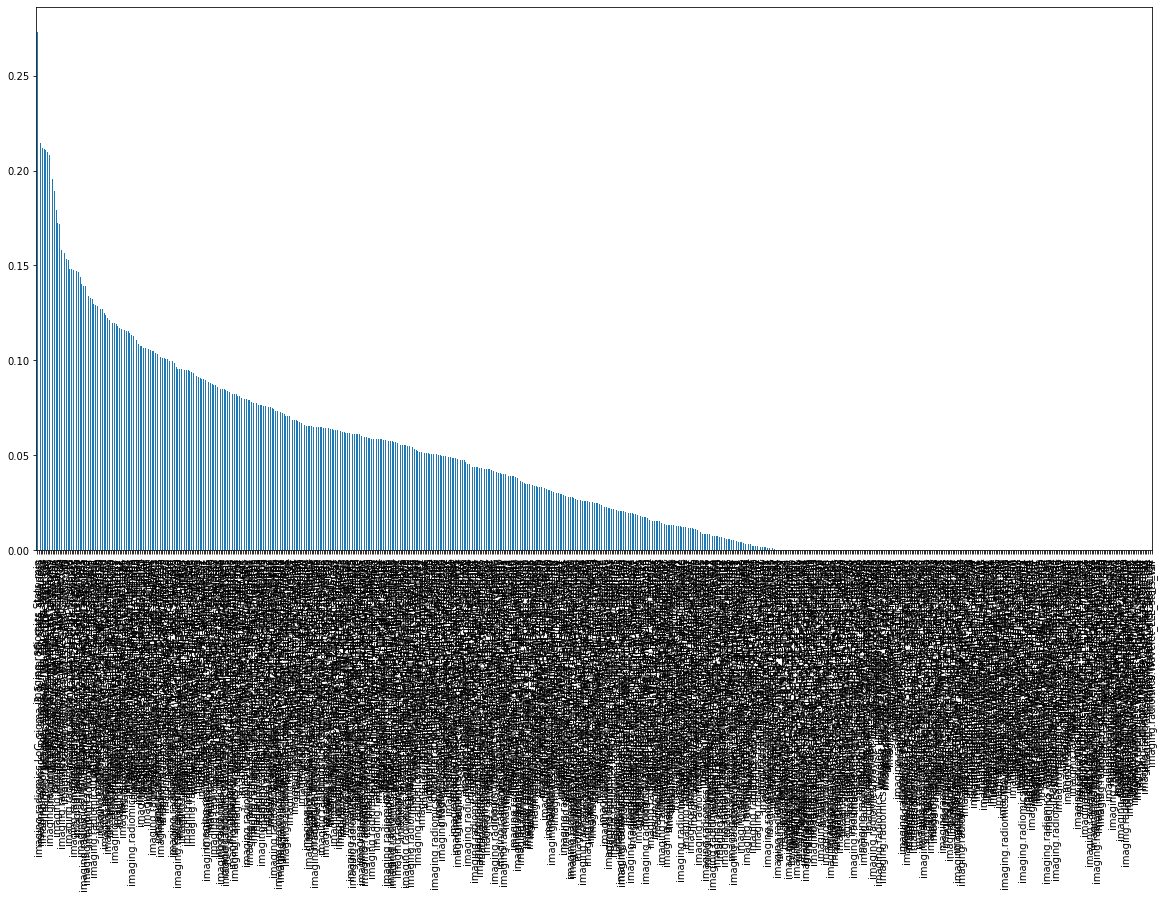

In [26]:
# visualize the feature importance
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))

Feature selection

In [78]:
# select top 300 features
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_classif, k=70)
selector.fit(X_train, y_train)


SelectKBest(k=70, score_func=<function mutual_info_classif at 0x7f2102498950>)

In [79]:

cols = selector.get_support(indices=True)

In [80]:
# new dataframes
new_train = X_train.iloc[:,cols]
new_test = X_test.iloc[:,cols]

In [81]:
new_train

,ID,imaging.radiomics.GLCM_invDiffnorm,imaging.radiomics.LoG_sigma_0_5_mm_2D_stats_uniformityPos,imaging.radiomics.LoG_sigma_0_5_mm_3D_stats_kurtosis,imaging.radiomics.LoG_sigma_1_mm_2D_stats_kurtosis,imaging.radiomics.LoG_sigma_1_mm_2D_stats_skewness,imaging.radiomics.LoG_sigma_1_mm_3D_stats_kurtosis,imaging.radiomics.LoG_sigma_2_5_mm_2D_stats_mean,imaging.radiomics.LoG_sigma_2_5_mm_2D_stats_skewness,imaging.radiomics.LoG_sigma_2_5_mm_3D_stats_mean,...,imaging.radiomics.Wavelet_LLH_rlgl_runPercentage,imaging.radiomics.Wavelet_LLH_rlgl_shortRunEmphasis,imaging.radiomics.Wavelet_LLH_stats_entropy,imaging.radiomics.Wavelet_LLH_stats_md,imaging.radiomics.Wavelet_LLH_stats_rms,imaging.radiomics.Wavelet_LLH_stats_std,imaging.radiomics.Wavelet_LLH_stats_uniformity,imaging.radiomics.Wavelet_LLH_stats_var,imaging.radiomics.Wavelet_LLL_rlgl_grayLevelNonuniformity,imaging.radiomics.Wavelet_LLL_stats_min
27,28,0.926811,0.454222,3.467071,4.728594,1.119575,3.783848,139.296249,0.024526,170.037643,...,0.867706,0.902008,3.793312,37.685818,48.437156,48.155429,0.086306,2318.945365,490.875622,934.678136
53,54,0.977932,0.897807,13.125383,17.121460,1.628000,13.891709,19.479666,1.758515,26.243433,...,0.706322,0.775787,2.863688,16.427577,26.832653,26.697885,0.193813,712.777052,6188.759956,656.694146
0,1,0.942861,0.740662,5.532140,8.274895,1.980529,5.241144,56.819794,1.276214,128.198441,...,0.631653,0.755779,2.801491,14.960976,26.220641,26.139042,0.232348,683.249522,1198.715517,-363.889654
82,83,0.984870,0.695279,17.934675,15.751621,3.214999,13.933283,43.315372,1.749664,41.390503,...,0.670719,0.762588,2.747794,27.030878,52.577315,52.269608,0.240026,2732.111935,10384.259680,480.958489
77,78,0.925251,0.465540,4.671446,6.008551,1.497120,4.781682,177.359589,0.676394,177.936691,...,0.868922,0.903819,4.055167,39.662405,54.445431,52.202287,0.074806,2725.078735,321.561440,856.583709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,0.967643,0.761046,9.231962,12.824434,2.567958,10.750283,43.719002,1.675682,45.512100,...,0.687786,0.768140,2.764024,25.198250,38.155290,37.817174,0.204395,1430.138669,6621.381511,718.606222
3,4,0.978728,0.393504,9.959401,18.830606,2.774982,15.389546,37.509022,1.634422,41.712135,...,0.833815,0.875508,3.189578,51.569796,69.532879,69.430332,0.137424,4820.570980,7615.824965,1090.306774
32,33,0.982834,0.852336,14.139720,18.413664,3.521683,15.671116,33.383499,2.227347,32.748104,...,0.768266,0.823715,3.057809,19.074958,29.273164,28.758635,0.160934,827.059066,6173.402981,749.562721
4,5,0.970343,0.589946,8.006059,10.712348,0.464212,9.277435,27.444771,-0.027070,36.007210,...,0.648818,0.732325,2.001353,29.679651,43.963523,43.902389,0.317589,1927.419722,2776.746495,2305.169603


Model Training

1. Decision-tree

In [82]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=2, max_leaf_nodes=None)
dt.fit(new_train, y_train)
test_pred = dt.predict(new_test)

In [83]:
Y_predicted_dt = dt.predict(new_test)
Y_pred_train_dt = dt.predict(new_train)

In [84]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_dt, y_test))

ac = accuracy_score(y_test, Y_predicted_dt)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_dt, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test, Y_predicted_dt, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_dt, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_train, Y_pred_train_dt, average='macro')
print('\n Macro Averaged F1-Score on training :'+str(fm))

fm = f1_score(y_test, Y_predicted_dt, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[6 1 2]
 [1 0 0]
 [3 3 2]]

 Macro Averaged Accuracy :0.4444444444444444

 Macro Averaged Precision :0.3055555555555555

 Macro Averaged Recall :0.3666666666666667

 Macro Averaged F1-Score :0.3216374269005848

 Macro Averaged F1-Score on training :1.0

 Micro Averaged F1-Score:0.4444444444444444


[Text(0.5476190476190477, 0.9285714285714286, 'X[15] <= 0.455\nentropy = 1.395\nsamples = 71\nvalue = [32, 8, 31]'),
 Text(0.2857142857142857, 0.7857142857142857, 'X[8] <= -0.124\nentropy = 1.279\nsamples = 40\nvalue = [26, 6, 8]'),
 Text(0.19047619047619047, 0.6428571428571429, 'X[30] <= 0.057\nentropy = 1.371\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.14285714285714285, 0.5, 'X[20] <= 182.85\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.09523809523809523, 0.35714285714285715, 'X[15] <= -0.442\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.047619047619047616, 0.21428571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.14285714285714285, 0.21428571428571427, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.19047619047619047, 0.35714285714285715, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.23809523809523808, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.38095238095238093, 0.6428571428571429, 'X[12] <=

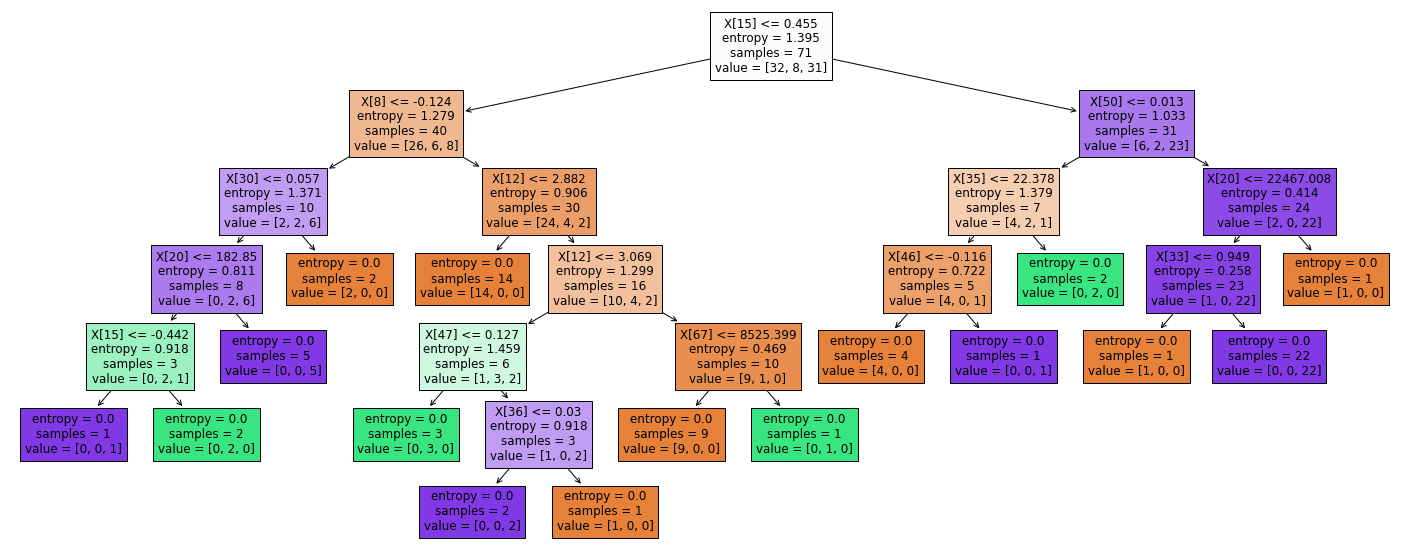

In [85]:
plt.figure(figsize=(25, 10))
tree.plot_tree(dt, filled=True)

2.Random forest

In [89]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
rf = rf.fit(new_train, y_train)
Y_predicted_rf = rf.predict(new_test)
Y_pred_train_rf = rf.predict(new_train)

In [90]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_rf, y_test))

ac = accuracy_score(y_test, Y_predicted_rf)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_rf, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test, Y_predicted_rf, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_rf, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test, Y_predicted_rf, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[5 1 2]
 [0 0 0]
 [5 3 2]]

 Macro Averaged Accuracy :0.3888888888888889

 Macro Averaged Precision :0.27499999999999997

 Macro Averaged Recall :0.3333333333333333

 Macro Averaged F1-Score :0.28042328042328046

 Micro Averaged F1-Score:0.3888888888888889


3. XG Boost

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)
Y_predicted_gb = gb.predict(X_test)
Y_pred_train_gb = gb.predict(X_train)

In [96]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_gb, y_test))

ac = accuracy_score(y_test, Y_predicted_gb)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_gb, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test,Y_predicted_gb, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_gb, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test,Y_predicted_gb, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[6 1 1]
 [1 0 0]
 [3 3 3]]

 Macro Averaged Accuracy :0.5

 Macro Averaged Precision :0.3611111111111111

 Macro Averaged Recall :0.45

 Macro Averaged F1-Score :0.37606837606837606

 Micro Averaged F1-Score:0.5


In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb = gb.fit(new_train, y_train)
Y_predicted_gb = gb.predict(new_test)
Y_pred_train_gb = gb.predict(new_train)

In [93]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_gb, y_test))

ac = accuracy_score(y_test, Y_predicted_gb)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_gb, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test,Y_predicted_gb, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_gb, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test,Y_predicted_gb, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[3 1 1]
 [0 0 1]
 [7 3 2]]

 Macro Averaged Accuracy :0.2777777777777778

 Macro Averaged Precision :0.25555555555555554

 Macro Averaged Recall :0.26666666666666666

 Macro Averaged F1-Score :0.21666666666666667

 Micro Averaged F1-Score:0.2777777777777778


4. Logistic Regression

In [97]:
logres=LogisticRegression(solver='liblinear')
logres.fit(X_train, y_train)
Y_predicted_logres = logres.predict(X_test)
Y_pred_train_logres = logres.predict(X_train)

In [98]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_logres, y_test))

ac = accuracy_score(y_test, Y_predicted_logres)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test, Y_predicted_logres, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[8 1 0]
 [0 0 0]
 [2 3 4]]

 Macro Averaged Accuracy :0.6666666666666666

 Macro Averaged Precision :0.4444444444444444

 Macro Averaged Recall :0.6

 Macro Averaged F1-Score :0.48582995951417

 Micro Averaged F1-Score:0.6666666666666666


In [99]:
logres=LogisticRegression(solver='liblinear')
logres.fit(new_train, y_train)
Y_predicted_logres = logres.predict(new_test)
Y_pred_train_logres = logres.predict(new_train)

In [100]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_logres, y_test))

ac = accuracy_score(y_test, Y_predicted_logres)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test, Y_predicted_logres, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test, Y_predicted_logres, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[8 4 1]
 [0 0 0]
 [2 0 3]]

 Macro Averaged Accuracy :0.6111111111111112

 Macro Averaged Precision :0.4051282051282052

 Macro Averaged Recall :0.5166666666666667

 Macro Averaged F1-Score :0.4541062801932367

 Micro Averaged F1-Score:0.6111111111111112
